# Promt:
dataset: 'country_name','year','ln_gdp', 'AI_Doc', 'eco_fre','Institutions_Index', 'Intellectualcapital','Infrastructure',  'DigitalCapacity','DataAvailability',  'trade'
- Describe, Correlation, Covariance
- Time series Data though year, category by country x: variable; y:year
- Multiple Scatter Plot:
    + Python: sns.pairplot(iris, hue="species", height=2.5)
- Multiple Scatter Plot, category by country, highlight top 10 highest country & top 10 lowest country
    + Python: sns.pairplot
-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
import os

# Check current working directory and list files
print("Current working directory:", os.getcwd())
print("Files in current directory:", os.listdir())

# Update the path to your CSV file as needed
# read_csv = pd.read_csv('data/251006_data.csv')
# df = read_csv
# df.head()

Current working directory: /content
Files in current directory: ['.config', 'sample_data']


In [25]:
df = pd.read_csv('251023_data.csv')
df.describe()
df = df[['country_id','year','ln_gdp_pc', 'AI_Index','AI_Doc','AdvEcoadvanced_eco','AI_Infrastructure','AI_Market_Ad','HC_Index','AI_Docs','classification1','Institutions_Index', 'elec_cons','industry_value','fdi','trade','urban_pop','classification1']]
df.head()

country_id  year  ln_gdp_pc  AI_Index  AI_Doc  AdvEcoadvanced_eco  \
0        ABW  2010  10.089681  0.160388     NaN                   0   
1        ABW  2011  10.154729  0.185760     NaN                   0   
2        ABW  2012  10.131408  0.200888     NaN                   0   
3        ABW  2013  10.158657  0.183799     NaN                   0   
4        ABW  2014  10.170832  0.194120     NaN                   0   

   AI_Infrastructure  AI_Market_Ad  HC_Index  AI_Docs  classification1  \
0           0.296925      0.023850       NaN      NaN              3.0   
1           0.345019      0.026501       NaN      NaN              3.0   
2           0.352261      0.049514       NaN      NaN              3.0   
3           0.339857      0.027741       NaN      NaN              3.0   
4           0.351463      0.036778       NaN      NaN              3.0   

   Institutions_Index  elec_cons  industry_value       fdi    trade  \
0            7.511430        NaN         11.5461   7.61167  135.465   
1            7.538450        NaN         12.3664  18.50580  154.438   
2            7.603280        NaN         10.0761 -12.03320  156.645   
3            7.644480        NaN         10.7497   9.97446  161.891   
4            6.624674        NaN         10.7995   7.46525  162.882   

   urban_pop  classification1  
0     43.059              3.0  
1     42.940              3.0  
2     42.957              3.0  
3     42.990              3.0  
4     43.041              3.0

In [5]:
print("="*80)
print("DESCRIPTIVE STATISTICS")
print("="*80)
print("\nBasic Info:")
print(df.info())

print("\n" + "="*80)
print("Summary Statistics:")
print(df.describe())

print("\n" + "="*80)
print("Missing Values:")
print(df.isnull().sum())

print("\n" + "="*80)
print("Data Shape:", df.shape)
print("Number of Countries:", df['country_id'].nunique())
print("Year Range:", df['year'].min(), "-", df['year'].max())



DESCRIPTIVE STATISTICS

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_id          3975 non-null   object 
 1   year                3975 non-null   int64  
 2   ln_gdp_pc           3844 non-null   float64
 3   AI_Index            3956 non-null   float64
 4   AI_Doc              2100 non-null   float64
 5   AdvEcoadvanced_eco  3975 non-null   int64  
 6   AI_Infrastructure   3946 non-null   float64
 7   AI_Market_Ad        3467 non-null   float64
 8   HC_Index            2718 non-null   float64
 9   AI_Docs             2100 non-null   float64
 10  classification1     3204 non-null   float64
 11  Institutions_Index  2828 non-null   float64
 12  elec_cons           2604 non-null   float64
 13  industry_value      3661 non-null   float64
 14  fdi                 3613 non-null   float64
 15  trade              


CORRELATION ANALYSIS

Correlation Matrix:
                    ln_gdp_pc  AI_Index    AI_Doc  AdvEcoadvanced_eco  \
ln_gdp_pc            1.000000  0.504272  0.121092            0.531113   
AI_Index             0.504272  1.000000  0.451111            0.315003   
AI_Doc               0.121092  0.451111  1.000000            0.106691   
AdvEcoadvanced_eco   0.531113  0.315003  0.106691            1.000000   
AI_Infrastructure    0.688296  0.728147  0.138831            0.523860   
AI_Market_Ad         0.135668  0.719976  0.202646            0.200492   
HC_Index             0.841059  0.538181  0.107448            0.581218   
classification1      0.940967  0.458414  0.093862            0.517069   
Institutions_Index   0.822242  0.543299  0.092109            0.661088   
elec_cons            0.670366  0.420659  0.066830            0.488787   
industry_value      -0.019369 -0.049409  0.010831           -0.149193   
fdi                  0.104807  0.130132 -0.018231            0.027343   
trade   

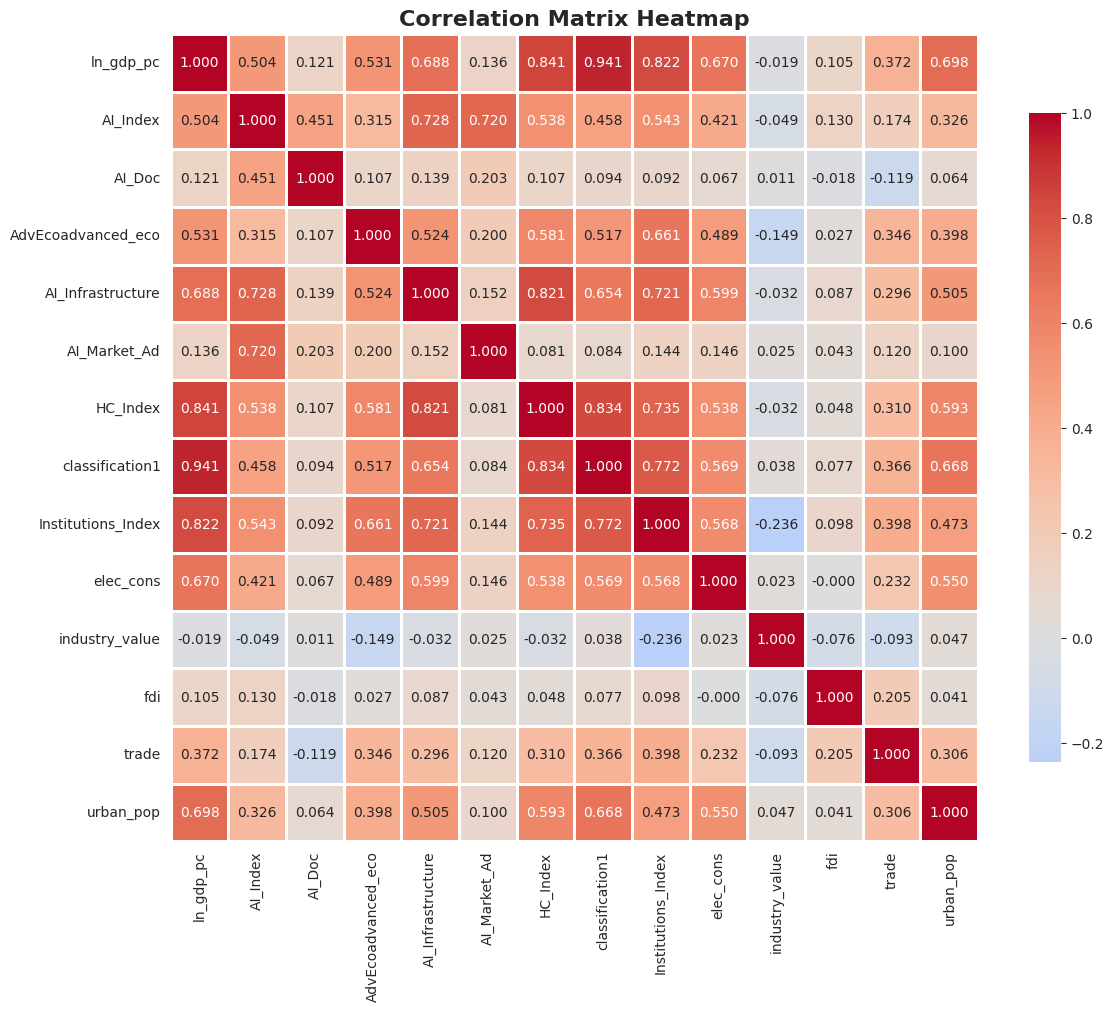

In [6]:
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Select numeric columns for correlation
numeric_cols = ['ln_gdp_pc', 'AI_Index','AI_Doc','AdvEcoadvanced_eco','AI_Infrastructure','AI_Market_Ad',
                'HC_Index','classification1','Institutions_Index',
                'elec_cons','industry_value','fdi','trade', 'urban_pop']

corr_matrix = df[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

print("\n" + "="*80)
print("Correlation with ln_gdp (sorted):")
print(corr_matrix['ln_gdp_pc'].sort_values(ascending=False))

# Highlight negative correlations
print("\n" + "="*80)
print("NEGATIVE CORRELATIONS WITH ln_gdp:")
negative_corr = corr_matrix['ln_gdp_pc'][corr_matrix['ln_gdp_pc'] < 0].sort_values()
print(negative_corr)

# Visualization: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


TIME SERIES ANALYSIS


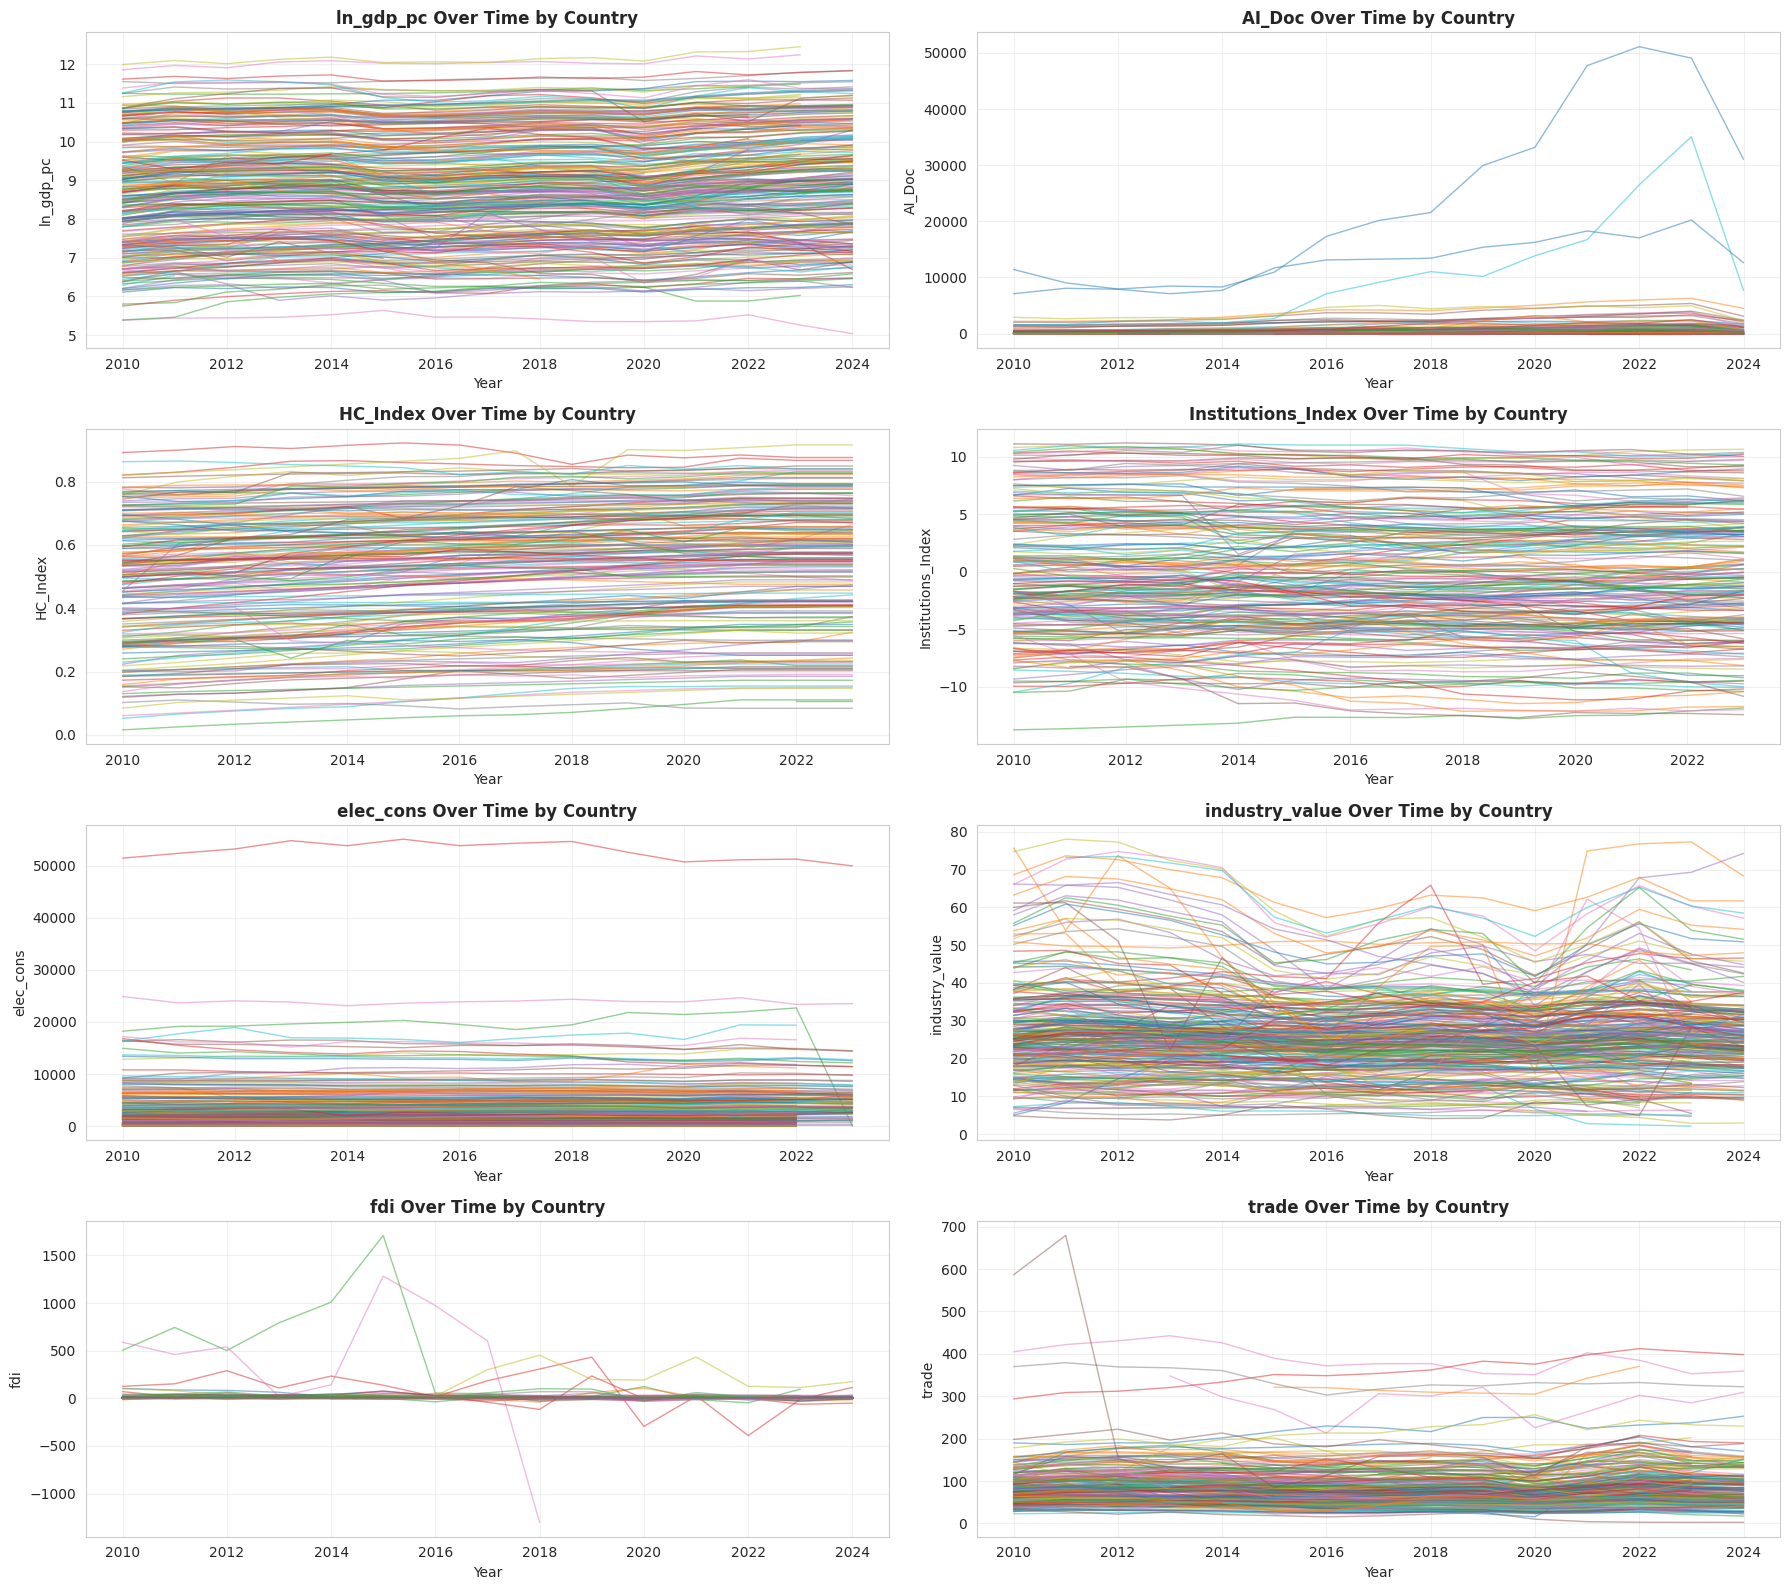

In [11]:
print("\n" + "="*80)
print("TIME SERIES ANALYSIS")
print("="*80)

# Create lagged ln_gdp variable
df_sorted = df.sort_values(['country_id', 'year'])
df_sorted['L_ln_gdp_pc'] = df_sorted.groupby('country_id')['ln_gdp_pc'].shift(1)

# Plot time series for each variable by country
variables = ['ln_gdp_pc', 'AI_Doc', 'HC_Index', 'Institutions_Index',
             'elec_cons','industry_value','fdi','trade']

fig, axes = plt.subplots(4, 2, figsize=(18, 16))
axes = axes.ravel()

for idx, var in enumerate(variables):
    ax = axes[idx]
    for country in df['country_id'].unique():
        country_data = df[df['country_id'] == country].sort_values('year')
        ax.plot(country_data['year'], country_data[var], alpha=0.5, linewidth=1)

    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel(var, fontsize=10)
    ax.set_title(f'{var} Over Time by Country', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


CREATING PAIRPLOT FOR ALL COUNTRIES


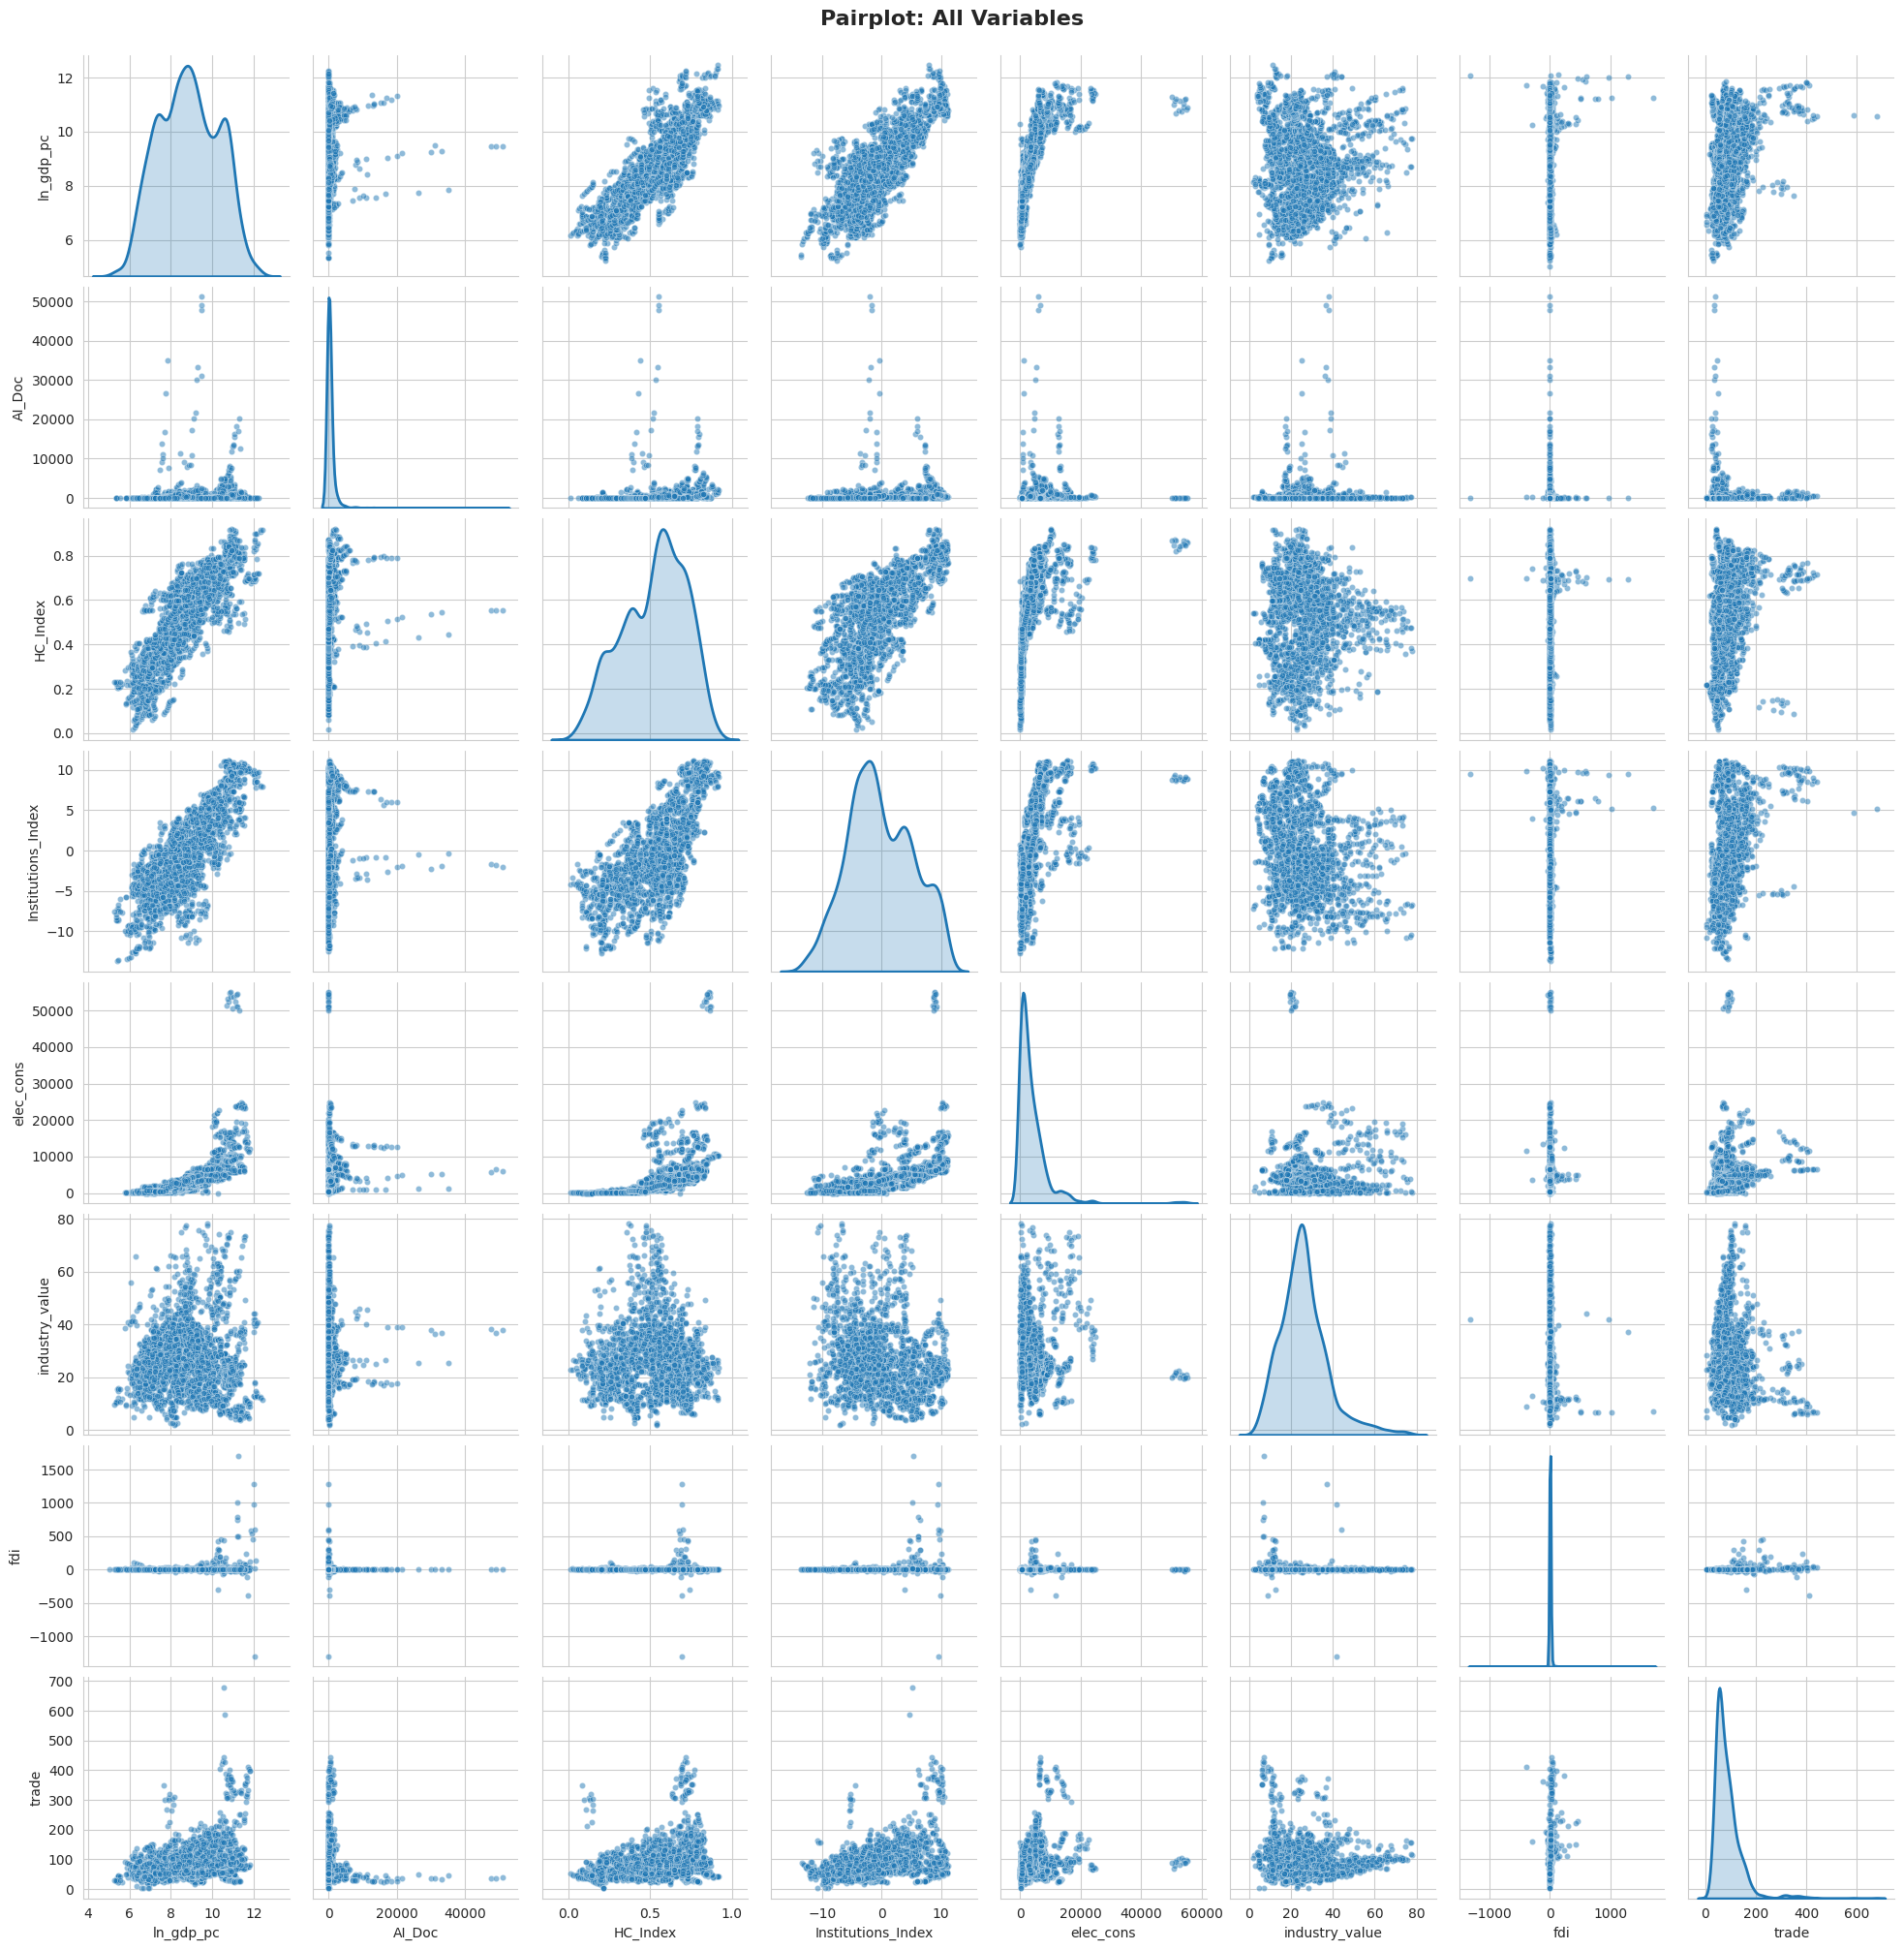

In [14]:
print("\n" + "="*80)
print("CREATING PAIRPLOT FOR ALL COUNTRIES")
print("="*80)

# Select key variables for pairplot
pairplot_vars = ['ln_gdp_pc', 'AI_Doc', 'HC_Index', 'Institutions_Index',
             'elec_cons','industry_value','fdi','trade']

# Create pairplot
g = sns.pairplot(df[pairplot_vars + ['country_id']],
                 diag_kind='kde',
                 height=2.5,
                 plot_kws={'alpha': 0.5, 's': 20},
                 diag_kws={'linewidth': 2})

g.fig.suptitle('Pairplot: All Variables', y=1.01, fontsize=16, fontweight='bold')
plt.show()

In [15]:
print("\n" + "="*80)
print("CREATING PAIRPLOT WITH TOP/BOTTOM COUNTRIES HIGHLIGHTED")
print("="*80)

# Calculate average ln_gdp per country
avg_gdp = df.groupby('country_name')['ln_gdp_pc'].mean().sort_values()

# Get top 10 and bottom 10 countries
bottom_20 = avg_gdp.head(20).index.tolist()
top_20 = avg_gdp.tail(20).index.tolist()

print("\nTop 20 Countries (Highest avg gdp):")
print(avg_gdp.tail(20))

print("\nBottom 20 Countries (Lowest avg gdp):")
print(avg_gdp.head(20))

# Create category column
def categorize_country(country):
    if country in top_20:
        return 'Top 20'
    elif country in bottom_20:
        return 'Bottom 20'
    else:
        return 'Others'

df['country_category'] = df['country_name'].apply(categorize_country)

# # Create pairplot with highlighted categories
g2 = sns.pairplot(df[pairplot_vars + ['country_category']],
                  hue='country_category',
                  hue_order=['Bottom 20', 'Others', 'Top 20'],
                  palette={'Top 20': 'red', 'Bottom 20': 'blue', 'Others': 'lightgray'},
                  diag_kind='kde',
                  height=2.5,
                  plot_kws={'alpha': 0.6, 's': 30},
                  diag_kws={'linewidth': 2})

g2.fig.suptitle('Pairplot: Top 20 (Red) vs Bottom 20 (Blue) Countries by GDP',
                y=1.01, fontsize=16, fontweight='bold')
g2._legend.set_bbox_to_anchor((1.05, 0.5))
plt.show()



CREATING PAIRPLOT WITH TOP/BOTTOM COUNTRIES HIGHLIGHTED


KeyError: 'country_name'

In [ ]:

# ============================================================================
# 6A. SEPARATE PAIRPLOT FOR TOP 10 COUNTRIES
# ============================================================================
print("\n" + "="*80)
print("CREATING PAIRPLOT FOR TOP 10 COUNTRIES (Highest AI_Doc)")
print("="*80)

# Filter data for top 10 countries
df_top10_gdp = df[df['country_category'] == 'Top 20'].copy()

# Create pairplot for top 10
g_top = sns.pairplot(df_top10_gdp[pairplot_vars + ['country_name']],
                     hue='country_name',
                     diag_kind='kde',
                     height=2.5,
                     plot_kws={'alpha': 0.7, 's': 40},
                     diag_kws={'linewidth': 2},
                     palette='tab10')

g_top.fig.suptitle('Pairplot: Top 10 Countries (Highest AI_Doc Sum)',
                   y=1.01, fontsize=16, fontweight='bold')
g_top._legend.set_bbox_to_anchor((1.02, 0.5))
g_top._legend.set_title('Country')
plt.show()



# ============================================================================
# 6B. SEPARATE PAIRPLOT FOR BOTTOM 10 COUNTRIES
# ============================================================================
print("\n" + "="*80)
print("CREATING PAIRPLOT FOR BOTTOM 10 COUNTRIES (Lowest AI_Doc)")
print("="*80)

# Filter data for bottom 10 countries
df_bottom10_gdp = df[df['country_category'] == 'Bottom 20'].copy()

# Create pairplot for bottom 10
g_bottom = sns.pairplot(df_bottom10_gdp[pairplot_vars + ['country_name']],
                        hue='country_name',
                        diag_kind='kde',
                        height=2.5,
                        plot_kws={'alpha': 0.7, 's': 40},
                        diag_kws={'linewidth': 2},
                        palette='tab10')

g_bottom.fig.suptitle('Pairplot: Bottom 10 Countries (Lowest AI_Doc Sum)',
                      y=1.01, fontsize=16, fontweight='bold')
g_bottom._legend.set_bbox_to_anchor((1.02, 0.5))
g_bottom._legend.set_title('Country')
plt.show()

# Visualization: Correlation Heatmap
df_top10 = df_top10_gdp[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(df_top10, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Visualization: Correlation Heatmap
df_bottom10 = df_bottom10_gdp[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(df_bottom10, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "="*80)
print("CREATING PAIRPLOT WITH TOP/BOTTOM COUNTRIES HIGHLIGHTED")
print("="*80)

# Calculate average AI_Doc per country
sum_AIdoc = df.groupby('country_name')['AI_Doc'].sum().sort_values()

# Get top 10 and bottom 10 countries
bottom_10 = sum_AIdoc.head(10).index.tolist()
top_10 = sum_AIdoc.tail(10).index.tolist()

print("\nTop 10 Countries (Highest AI_Doc):")
print(sum_AIdoc.tail(10))

print("\nBottom 10 Countries (Lowest Ai_Doc):")
print(sum_AIdoc.head(10))

# Create category column
def categorize_country(country):
    if country in top_10:
        return 'Top 10'
    elif country in bottom_10:
        return 'Bottom 10'
    else:
        return 'Others'

df['country_category'] = df['country_name'].apply(categorize_country)

# Create pairplot with highlighted categories
g2 = sns.pairplot(df[pairplot_vars + ['country_category']],
                  hue='country_category',
                  hue_order=['Bottom 10', 'Others', 'Top 10'],
                  palette={'Top 10': 'red', 'Bottom 10': 'blue', 'Others': 'lightgray'},
                  diag_kind='kde',
                  height=2.5,
                  plot_kws={'alpha': 0.6, 's': 30},
                  diag_kws={'linewidth': 2})

g2.fig.suptitle('Pairplot: Top 10 (Red) vs Bottom 10 (Blue) Countries by AI_Doc',
                y=1.01, fontsize=16, fontweight='bold')
g2._legend.set_bbox_to_anchor((1.05, 0.5))
plt.show()



In [ ]:
# ============================================================================
# 6A. SEPARATE PAIRPLOT FOR TOP 10 COUNTRIES
# ============================================================================
print("\n" + "="*80)
print("CREATING PAIRPLOT FOR TOP 10 COUNTRIES (Highest AI_Doc)")
print("="*80)

# Filter data for top 10 countries
df_top10 = df[df['country_category'] == 'Top 10'].copy()

# Create pairplot for top 10
g_top = sns.pairplot(df_top10[pairplot_vars + ['country_name']],
                     hue='country_name',
                     diag_kind='kde',
                     height=2.5,
                     plot_kws={'alpha': 0.7, 's': 40},
                     diag_kws={'linewidth': 2},
                     palette='tab10')

g_top.fig.suptitle('Pairplot: Top 10 Countries (Highest AI_Doc Sum)',
                   y=1.01, fontsize=16, fontweight='bold')
g_top._legend.set_bbox_to_anchor((1.02, 0.5))
g_top._legend.set_title('Country')
plt.show()



# ============================================================================
# 6B. SEPARATE PAIRPLOT FOR BOTTOM 10 COUNTRIES
# ============================================================================
print("\n" + "="*80)
print("CREATING PAIRPLOT FOR BOTTOM 10 COUNTRIES (Lowest AI_Doc)")
print("="*80)

# Filter data for bottom 10 countries
df_bottom10 = df[df['country_category'] == 'Bottom 10'].copy()

# Create pairplot for bottom 10
g_bottom = sns.pairplot(df_bottom10[pairplot_vars + ['country_name']],
                        hue='country_name',
                        diag_kind='kde',
                        height=2.5,
                        plot_kws={'alpha': 0.7, 's': 40},
                        diag_kws={'linewidth': 2},
                        palette='tab10')

g_bottom.fig.suptitle('Pairplot: Bottom 10 Countries (Lowest AI_Doc Sum)',
                      y=1.01, fontsize=16, fontweight='bold')
g_bottom._legend.set_bbox_to_anchor((1.02, 0.5))
g_bottom._legend.set_title('Country')
plt.show()

In [ ]:
# Visualization: Correlation Heatmap
df_top10 = df_top10[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(df_top10, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Visualization: Correlation Heatmap
df_bottom10 = df_bottom10[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(df_bottom10, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "="*80)
print("FOCUSED ANALYSIS: DataAvailability & Infrastructure vs ln_gdp")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# DataAvailability vs ln_gdp - All countries
axes[0, 0].scatter(df['DataAvailability'], df['ln_gdp'], alpha=0.5)
z = np.polyfit(df['DataAvailability'].dropna(),
               df.loc[df['DataAvailability'].notna(), 'ln_gdp'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['DataAvailability'].sort_values(),
                p(df['DataAvailability'].sort_values()), "r--", linewidth=2)
axes[0, 0].set_xlabel('Data Availability', fontsize=12)
axes[0, 0].set_ylabel('ln_gdp', fontsize=12)
axes[0, 0].set_title(f'DataAvailability vs ln_gdp\nCorr: {df["DataAvailability"].corr(df["ln_gdp"]):.3f}',
                     fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# DataAvailability vs ln_gdp - Highlighted
scatter1 = axes[0, 1].scatter(df[df['country_category']=='Others']['DataAvailability'],
                              df[df['country_category']=='Others']['ln_gdp'],
                              alpha=0.3, c='lightgray', s=30, label='Others')
scatter2 = axes[0, 1].scatter(df[df['country_category']=='Bottom 10']['DataAvailability'],
                              df[df['country_category']=='Bottom 10']['ln_gdp'],
                              alpha=0.7, c='blue', s=50, label='Bottom 10')
scatter3 = axes[0, 1].scatter(df[df['country_category']=='Top 10']['DataAvailability'],
                              df[df['country_category']=='Top 10']['ln_gdp'],
                              alpha=0.7, c='red', s=50, label='Top 10')
axes[0, 1].set_xlabel('Data Availability', fontsize=12)
axes[0, 1].set_ylabel('ln_gdp', fontsize=12)
axes[0, 1].set_title('DataAvailability vs ln_gdp (Highlighted)', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Infrastructure vs ln_gdp - All countries
axes[1, 0].scatter(df['Infrastructure'], df['ln_gdp'], alpha=0.5)
z = np.polyfit(df['Infrastructure'].dropna(),
               df.loc[df['Infrastructure'].notna(), 'ln_gdp'], 1)
p = np.poly1d(z)
axes[1, 0].plot(df['Infrastructure'].sort_values(),
                p(df['Infrastructure'].sort_values()), "r--", linewidth=2)
axes[1, 0].set_xlabel('Infrastructure', fontsize=12)
axes[1, 0].set_ylabel('ln_gdp', fontsize=12)
axes[1, 0].set_title(f'Infrastructure vs ln_gdp\nCorr: {df["Infrastructure"].corr(df["ln_gdp"]):.3f}',
                     fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Infrastructure vs ln_gdp - Highlighted
scatter1 = axes[1, 1].scatter(df[df['country_category']=='Others']['Infrastructure'],
                              df[df['country_category']=='Others']['ln_gdp'],
                              alpha=0.3, c='lightgray', s=30, label='Others')
scatter2 = axes[1, 1].scatter(df[df['country_category']=='Bottom 10']['Infrastructure'],
                              df[df['country_category']=='Bottom 10']['ln_gdp'],
                              alpha=0.7, c='blue', s=50, label='Bottom 10')
scatter3 = axes[1, 1].scatter(df[df['country_category']=='Top 10']['Infrastructure'],
                              df[df['country_category']=='Top 10']['ln_gdp'],
                              alpha=0.7, c='red', s=50, label='Top 10')
axes[1, 1].set_xlabel('Infrastructure', fontsize=12)
axes[1, 1].set_ylabel('ln_gdp', fontsize=12)
axes[1, 1].set_title('Infrastructure vs ln_gdp (Highlighted)', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical tests for negative correlations
print("\n" + "="*80)
print("STATISTICAL TESTS FOR NEGATIVE CORRELATIONS")
print("="*80)

# DataAvailability
pearson_r, p_value = stats.pearsonr(df['DataAvailability'].dropna(),
                                     df.loc[df['DataAvailability'].notna(), 'ln_gdp'])
print(f"\nDataAvailability vs ln_gdp:")
print(f"  Pearson r: {pearson_r:.4f}")
print(f"  P-value: {p_value:.4e}")
print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")

# Infrastructure
pearson_r, p_value = stats.pearsonr(df['Infrastructure'].dropna(),
                                     df.loc[df['Infrastructure'].notna(), 'ln_gdp'])
print(f"\nInfrastructure vs ln_gdp:")
print(f"  Pearson r: {pearson_r:.4f}")
print(f"  P-value: {p_value:.4e}")
print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")


In [ ]:
print("\n" + "="*80)
print("CREATING BOX PLOTS")
print("="*80)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

plot_vars = ['ln_gdp', 'Intellectualcapital', 'DigitalCapacity',
             'DataAvailability', 'Infrastructure', 'AI_Doc', 'trade', 'Institutions_Index']

for idx, var in enumerate(plot_vars):
    sns.boxplot(data=df, x='country_category', y=var,
                order=['Bottom 10', 'Others', 'Top 10'],
                palette={'Top 10': 'red', 'Bottom 10': 'blue', 'Others': 'lightgray'},
                ax=axes[idx])
    axes[idx].set_title(f'{var} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Task
Analyze and compare countries with `AdvEcoadvanced_eco` equal to 1 and those with `AdvEcoadvanced_eco` equal to 0 using descriptive statistics and visualizations.

## Filter data

### Subtask:
Create two separate dataframes: one for countries with `AdvEcoadvanced_eco` equal to 1 and another for countries with `AdvEcoadvanced_eco` equal to 0.


**Reasoning**:
Filter the dataframe to create two new dataframes based on the 'AdvEcoadvanced_eco' column.



In [16]:
df_advanced = df[df['AdvEcoadvanced_eco'] == 1].copy()
df_developing = df[df['AdvEcoadvanced_eco'] == 0].copy()

## Descriptive statistics

### Subtask:
Calculate and display descriptive statistics for key variables for each group.


**Reasoning**:
Calculate and display descriptive statistics for the selected numeric columns in both the advanced and developing economies dataframes.



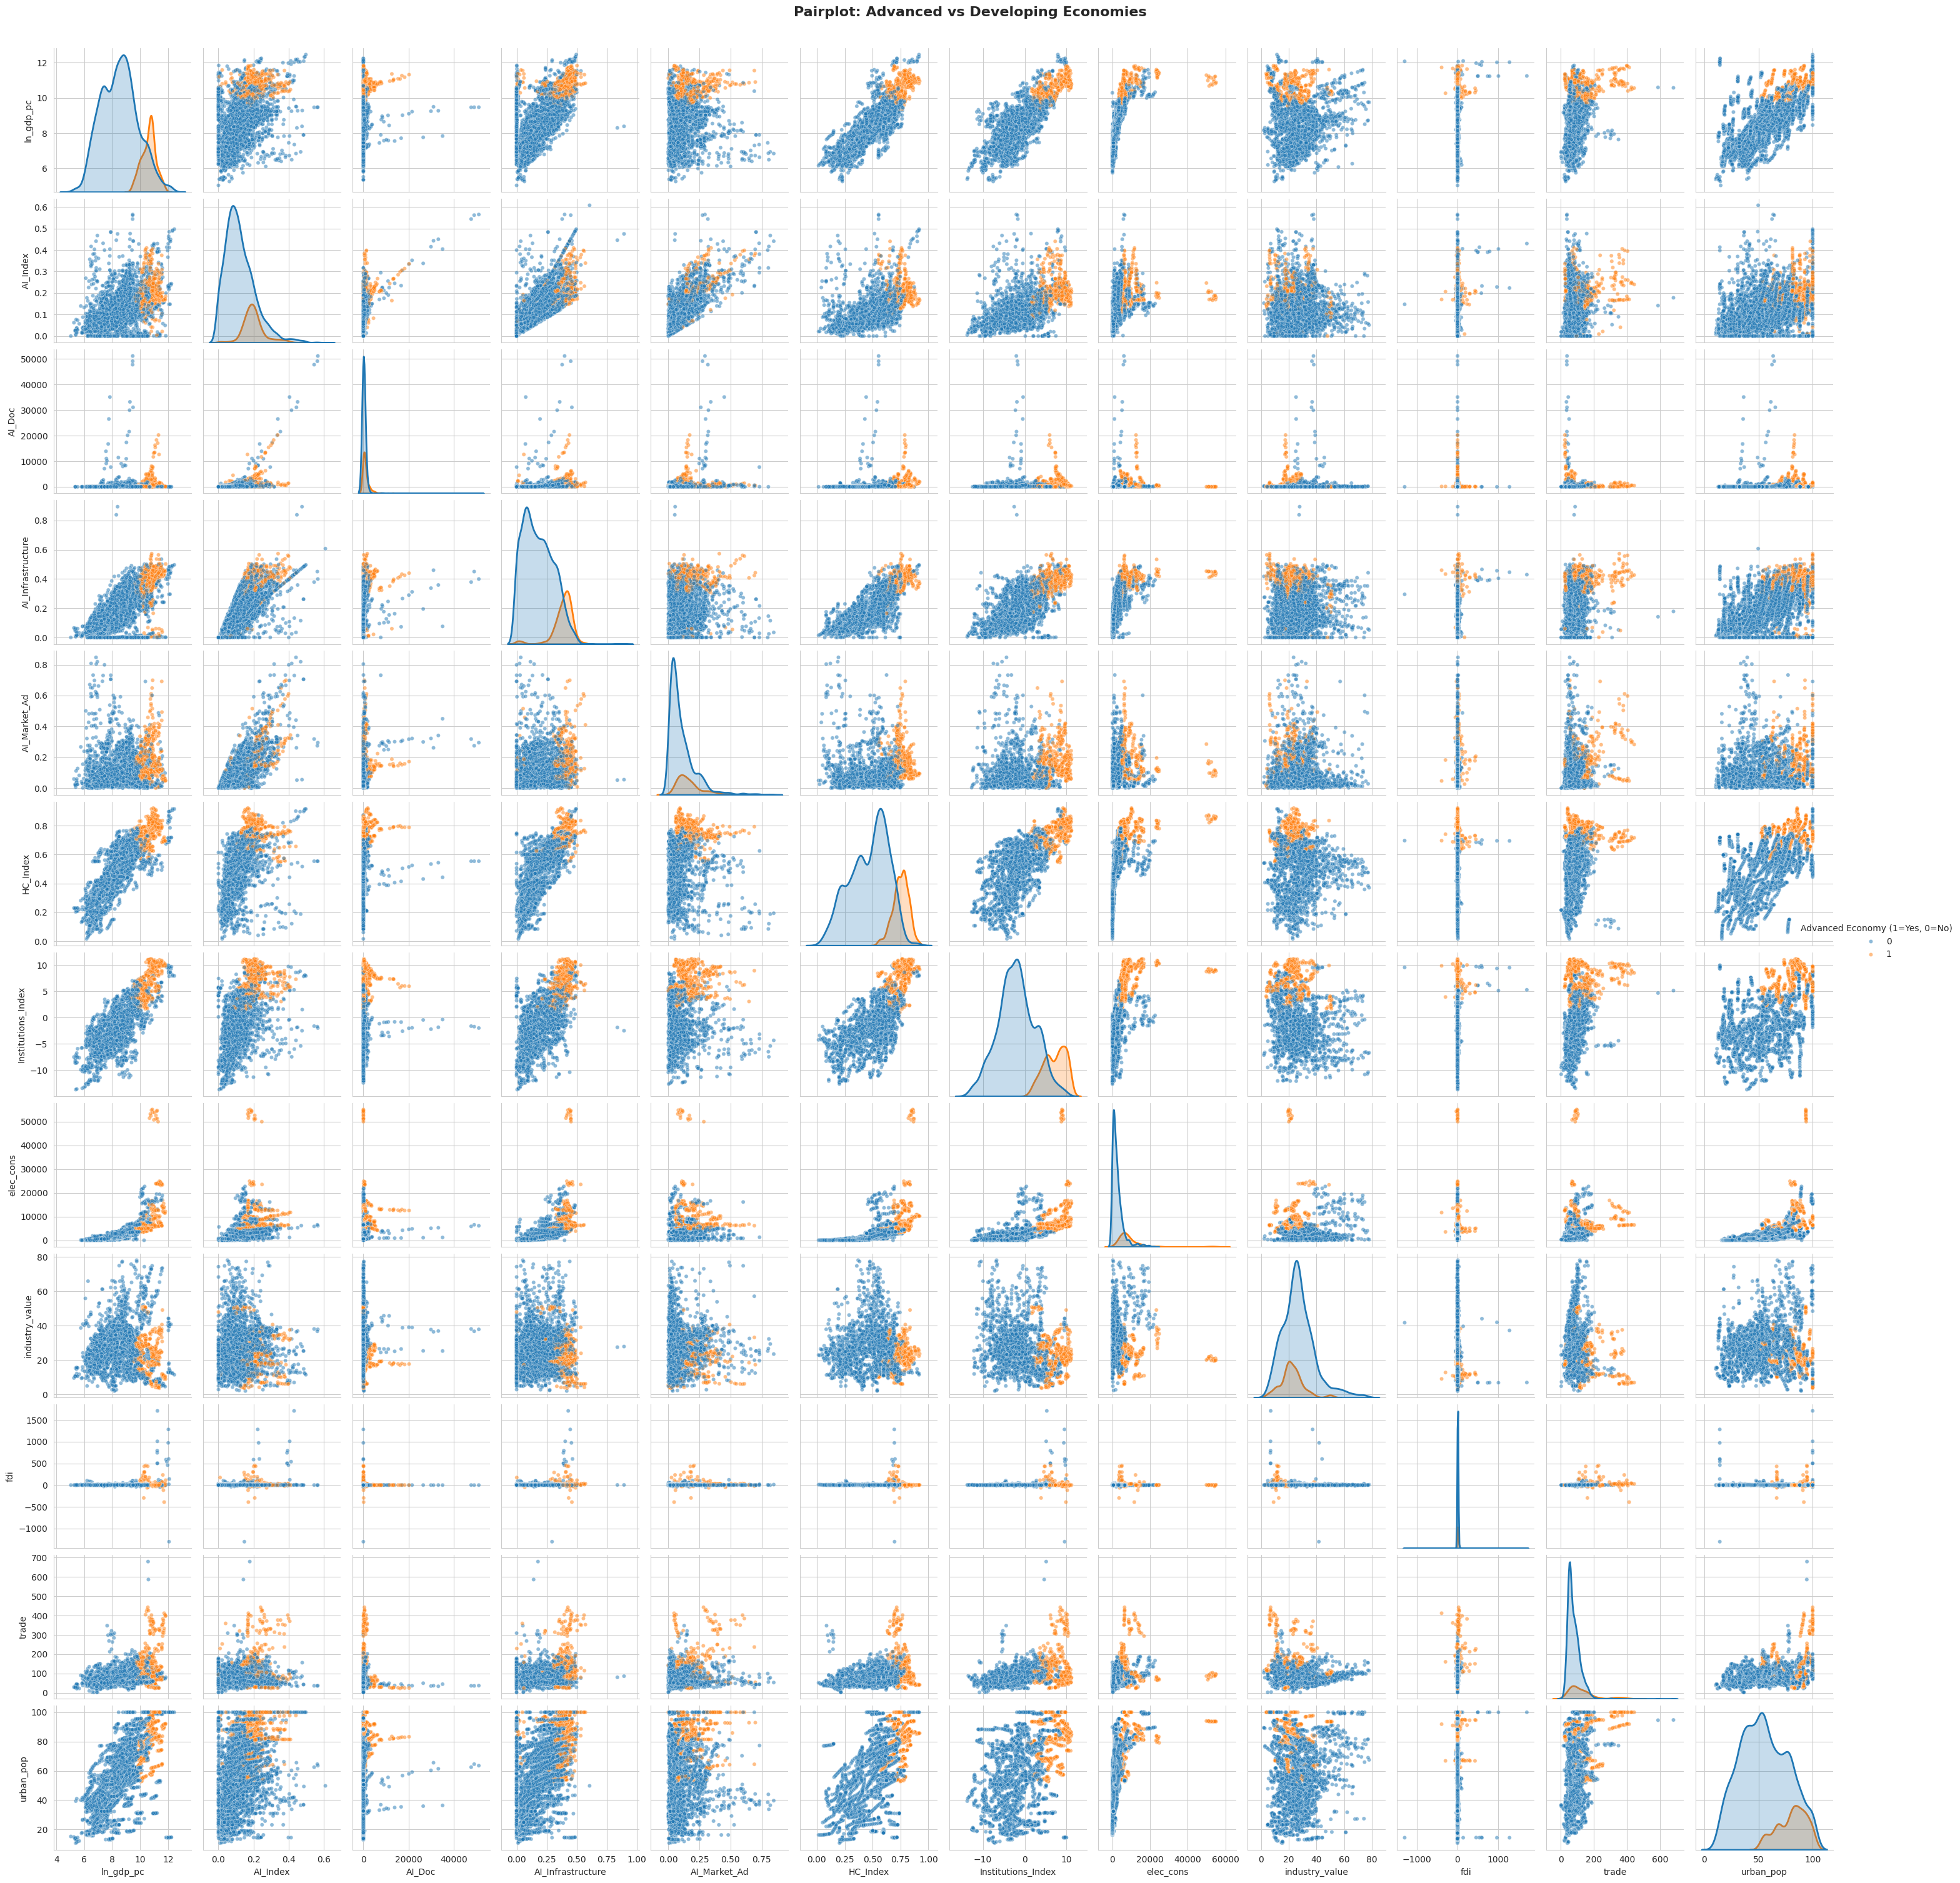

ValueError: Data must be 1-dimensional, got ndarray of shape (3975, 2) instead

In [26]:
# Select key variables for pairplot
plot_vars_comparison = ['ln_gdp_pc', 'AI_Index','AI_Doc','AI_Infrastructure','AI_Market_Ad', 'HC_Index', 'Institutions_Index',
                        'elec_cons', 'industry_value', 'fdi', 'trade', 'urban_pop']

# Create pairplot by Advanced Economy
g = sns.pairplot(df[plot_vars_comparison + ['AdvEcoadvanced_eco']],
                 hue='AdvEcoadvanced_eco',
                 diag_kind='kde',
                 height=2.5,
                 plot_kws={'alpha': 0.5, 's': 20},
                 diag_kws={'linewidth': 2})

g.fig.suptitle('Pairplot: Advanced vs Developing Economies', y=1.01, fontsize=16, fontweight='bold')
g._legend.set_title('Advanced Economy (1=Yes, 0=No)')
plt.show()



In [35]:
# Select key variables for pairplot
plot_vars_comparison = ['ln_gdp_pc', 'AI_Index','AI_Doc','AI_Infrastructure','AI_Market_Ad', 'HC_Index', 'Institutions_Index',
                        'elec_cons', 'industry_value', 'fdi', 'trade', 'urban_pop']

# Convert 'classification1' to categorical type and handle potential NaNs
df['classification1'] = df['classification1'].astype('category')
# Optionally, fill NaN values in classification1 if necessary for plotting,
# or handle them in the plotting function if PairGrid supports it.
# For now, we assume PairGrid will handle NaNs in hue.

# Create a PairGrid
g = sns.PairGrid(df, vars=plot_vars_comparison, hue='classification1', height=2.5, diag_sharey=False)

# Map plotting functions to the grid
g.map_diag(sns.kdeplot, linewidth=2)
g.map_lower(sns.scatterplot, alpha=0.5, s=20)
g.map_upper(sns.scatterplot, alpha=0.5, s=20)

# Add a legend
g.add_legend(title='Income Group')

g.fig.suptitle('Pairplot: Income Group Economies', y=1.01, fontsize=16, fontweight='bold')
plt.show()

ValueError: 2

In [31]:
print(df.dtypes)

country_id             object
year                    int64
ln_gdp_pc             float64
AI_Index              float64
AI_Doc                float64
AdvEcoadvanced_eco      int64
AI_Infrastructure     float64
AI_Market_Ad          float64
HC_Index              float64
AI_Docs               float64
classification1       float64
Institutions_Index    float64
elec_cons             float64
industry_value        float64
fdi                   float64
trade                 float64
urban_pop             float64
classification1       float64
dtype: object
